In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Gathering

In [3]:
## load data 
df=pd.read_csv('pune_house_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'pune_house_data.csv'

In [136]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


## EDA 

In [137]:
df.shape

(13320, 9)

In [138]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [139]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [140]:
df.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

# Size

In [141]:
## value_counts return the how much value of specific category have 

In [142]:
df['size'].value_counts().to_dict()

{'2 BHK': 5199,
 '3 BHK': 4310,
 '4 Bedroom': 826,
 '4 BHK': 591,
 '3 Bedroom': 547,
 '1 BHK': 538,
 '2 Bedroom': 329,
 '5 Bedroom': 297,
 '6 Bedroom': 191,
 '1 Bedroom': 105,
 '8 Bedroom': 84,
 '7 Bedroom': 83,
 '5 BHK': 59,
 '9 Bedroom': 46,
 '6 BHK': 30,
 '7 BHK': 17,
 '1 RK': 13,
 '10 Bedroom': 12,
 '9 BHK': 8,
 '8 BHK': 5,
 '11 BHK': 2,
 '11 Bedroom': 2,
 '10 BHK': 2,
 '14 BHK': 1,
 '13 BHK': 1,
 '12 Bedroom': 1,
 '27 BHK': 1,
 '43 Bedroom': 1,
 '16 BHK': 1,
 '19 BHK': 1,
 '18 Bedroom': 1}

In [143]:
df['size'].isna().sum()

16

In [144]:
import re
def clean(a):
    if type(a)==str:
        b=a.replace('BHK','').replace('Bedroom','').replace('1 RK','0.66')
        try:
            b=int(b)
        except:
            return b
        return b

In [145]:
df['clean_size']=df['size'].apply(clean).astype('float')

# Total_sqft

In [146]:
df['total_sqft'].value_counts().to_dict()

{'1200': 843,
 '1100': 221,
 '1500': 205,
 '2400': 196,
 '600': 180,
 '1000': 172,
 '1350': 133,
 '1050': 123,
 '1300': 117,
 '1250': 114,
 '900': 112,
 '1400': 108,
 '1800': 104,
 '1150': 101,
 '1600': 101,
 '1140': 91,
 '2000': 83,
 '1450': 70,
 '1650': 69,
 '800': 67,
 '3000': 66,
 '1075': 66,
 '1020': 63,
 '2500': 62,
 '1550': 60,
 '1160': 60,
 '1125': 60,
 '950': 59,
 '1180': 58,
 '1700': 58,
 '1260': 57,
 '1255': 56,
 '1220': 55,
 '1080': 55,
 '1070': 53,
 '700': 52,
 '750': 52,
 '1225': 48,
 '4000': 48,
 '1175': 48,
 '1320': 46,
 '1240': 46,
 '2100': 46,
 '1230': 45,
 '1060': 45,
 '1210': 44,
 '850': 43,
 '1280': 42,
 '1270': 41,
 '1185': 41,
 '1190': 40,
 '1170': 40,
 '1410': 40,
 '1750': 39,
 '1330': 38,
 '1025': 38,
 '1290': 37,
 '1310': 37,
 '1850': 37,
 '1065': 36,
 '1194': 36,
 '1090': 35,
 '1215': 35,
 '500': 34,
 '1360': 33,
 '2700': 33,
 '1115': 33,
 '1900': 32,
 '3500': 32,
 '1120': 32,
 '1464': 32,
 '1530': 31,
 '1205': 31,
 '1340': 31,
 '2200': 31,
 '1430': 31,
 '103

In [147]:
def total_sqft(str1):
    if re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]',str1):
            a=re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]+',str1)
#             print(a[0])
            z=re.split('-',a[0])
#             print(z[0],z[1])
            a1=int(z[0])
            a2=int(z[1])
            mean=(a1+a2)/2
#             print(mean)
#             list1.append(mean)
            return str(mean)
#     list1=[]
#     elif 'Sq. Meter' in str1:
#         for i in str1:
#             if i.isdecimal()
#                 list1.append(i)
    
    else:
        
        if 'Acres' in str1:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i) 
            h=''.join(list1)
            Sqaure_foot=float(h)*43560
            return str(round(Sqaure_foot,2))    
                    
            
        elif 'Sq. Meter' in str1:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i)
            if list1.count('.')==2:
                list1.pop(-1)
                h=''.join(list1)
                Sqaure_foot=float(h)*10.764
                return str(round(Sqaure_foot,2))
            else:
                h=''.join(list1)
                Sqaure_foot=float(h)*10.764
                return str(round(Sqaure_foot,2))
        elif 'Sq. Yards' in str1:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i)
            if list1.count('.')==2:
                list1.pop(-1)
                h=''.join(list1)
                Sqaure_foot=float(h)*9
                return str(round(Sqaure_foot,2))
            else:
                h=''.join(list1)
                Sqaure_foot=float(h)*9
                return str(round(Sqaure_foot,2))
        else:
            list1=[]
            for i in str1:
                if i.isdecimal() or i=='.':
                    list1.append(i)
            
            return ''.join(list1)
                    



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mayur\AppData\Local\Temp\ipykernel_10432\683045121.py:2: SyntaxWarning: invalid escape sequence '\d'
  if re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]',str1):
C:\Users\mayur\AppData\Local\Temp\ipykernel_10432\683045121.py:3: SyntaxWarning: invalid escape sequence '\d'
  a=re.findall('[\d]+[\s]*[-]{1}[\s]*[\d]+',str1)


In [148]:
df['total_sqft_clean1']=df['total_sqft'].apply(total_sqft).astype('float')

In [149]:
print(df[['total_sqft_clean1','total_sqft']].to_string())

       total_sqft_clean1         total_sqft
0                1056.00               1056
1                2600.00               2600
2                1440.00               1440
3                1521.00               1521
4                1200.00               1200
5                1170.00               1170
6                2732.00               2732
7                3300.00               3300
8                1310.00               1310
9                1020.00               1020
10               1800.00               1800
11               2785.00               2785
12               1000.00               1000
13               1100.00               1100
14               2250.00               2250
15               1175.00               1175
16               1180.00               1180
17               1540.00               1540
18               2770.00               2770
19               1100.00               1100
20                600.00                600
21               1755.00        

In [150]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,clean_size,total_sqft_clean1
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,2.0,1056.0
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,4.0,2600.0
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,3.0,1440.0
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,3.0,1521.0
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,2.0,1200.0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          13320 non-null  object 
 1   availability       13320 non-null  object 
 2   size               13304 non-null  object 
 3   society            7818 non-null   object 
 4   total_sqft         13320 non-null  object 
 5   bath               13247 non-null  float64
 6   balcony            12711 non-null  float64
 7   price              13320 non-null  float64
 8   site_location      13319 non-null  object 
 9   clean_size         13304 non-null  float64
 10  total_sqft_clean1  13320 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


In [152]:
 ##df['price_per_sqft']=(df['price']*100000)/df['total_sqft_clean']

# Location

In [153]:
df['site_location'].value_counts()

site_location
Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: count, Length: 97, dtype: int64

In [154]:
df['site_location'].isna().sum()

1

In [155]:
## Fill missing value by using mode because it is categorical variable 

In [156]:
df['site_location']=df['site_location'].fillna(df['site_location'].mode()[0])

In [157]:
df['site_location'].isna().sum()

0

In [158]:
df['site_location']=df['site_location'].apply(lambda x:x.strip())


In [159]:
df.site_location

0                 Alandi Road
1             Ambegaon Budruk
2                  Anandnagar
3                       Aundh
4                  Aundh Road
                 ...         
13315                  Pashan
13316               Paud Road
13317                Pirangut
13318            Prabhat Road
13319    Pune Railway Station
Name: site_location, Length: 13320, dtype: object

In [160]:
## Here we give other name to that location which has less than 10 count 

In [161]:
def convert(b):
    a=b.value_counts().to_dict()
    l=[]
    for i,j in a.items():
        if j<=10:
            l.append(i)
    d={}
    for i in l:
        d.update({i:'other'})
    b.replace(d,inplace=True)


In [162]:
convert(df['site_location'])
print(df['site_location'].shape)
print(df['site_location'].nunique())

(13320,)
97


In [163]:
df['site_location'].nunique()  ## it will give unique location count

97

In [164]:
df['site_location']

0                 Alandi Road
1             Ambegaon Budruk
2                  Anandnagar
3                       Aundh
4                  Aundh Road
                 ...         
13315                  Pashan
13316               Paud Road
13317                Pirangut
13318            Prabhat Road
13319    Pune Railway Station
Name: site_location, Length: 13320, dtype: object

In [165]:
## Now we convert that location in numeric form by using get dummies function. we can convert it into new data frame

In [168]:
df2=pd.get_dummies(df['site_location'])
df2=df2.astype(int)

In [170]:
df2 ### Here it will create data frame where  columns 97 and rows are 13320

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# Here we combining df1 and df2

In [187]:
df3=pd.concat((df,df2),axis=1)


In [188]:
df3

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,clean_size,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,2.0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,4.0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,3.0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,3.0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan,5.0,...,0,0,0,0,0,0,0,0,0,0
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road,4.0,...,0,0,0,0,0,0,0,0,0,0
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut,2.0,...,0,0,0,0,0,0,0,0,0,0
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road,4.0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df3['total_sqft_clean1'].isna().sum()

0

In [190]:
df3.isna().sum()

area_type          0
availability       0
size              16
society         5502
total_sqft         0
                ... 
Wakadewadi         0
Wanowrie           0
Warje              0
Yerawada           0
other              0
Length: 108, dtype: int64

In [191]:
# Dropping columns
# 1st we drop unecessary columns 

In [192]:
data=df3
data.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,clean_size,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,2.0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,4.0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,3.0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,3.0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,2.0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
data.drop(['area_type','availability','site_location','society','total_sqft','size'],axis=1,inplace=True)

In [194]:
data.head()

,bath,balcony,price,clean_size,total_sqft_clean1,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,2.0,1.0,39.07,2.0,1056.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4.0,2600.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,3.0,1440.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3.0,1521.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,1200.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


bath                  73
balcony              609
price                  0
clean_size            16
total_sqft_clean1      0
                    ... 
Wakadewadi             0
Wanowrie               0
Warje                  0
Yerawada               0
other                  0
Length: 102, dtype: int64

# # Outlier Detection and Missing Value Imputation and Outlier Handling

In [199]:
data.isna().sum()

bath                  73
balcony              609
price                  0
clean_size            16
total_sqft_clean1      0
                    ... 
Wakadewadi             0
Wanowrie               0
Warje                  0
Yerawada               0
other                  0
Length: 102, dtype: int64

# size

<Axes: xlabel='clean_size'>

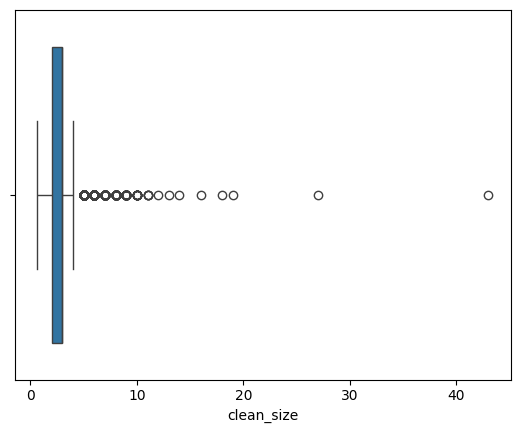

In [198]:
sns.boxplot(x=df['clean_size']) ## Size columns has outliers so we can fill missing values by using median

In [225]:
## Size columns has outliers so we can fill missing values by using median
data['clean_size']=data['clean_size'].fillna(data['clean_size'].median())

In [226]:
data['clean_size'].isna().sum()

0

In [207]:
## Now we handle outliers 

In [246]:
def outlier_handle(a):
    q1=data[a].quantile(0.25)
    q3=data[a].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    data.loc[data[a]>upper]=round(upper,0)
    data.loc[data[a]<lower]=lower
    

In [215]:
# q1=data['clean_size'].quantile(0.25)
# q3=data['clean_size'].quantile(0.75)
# iqr=q3-q1
# lower=q1-1.5*iqr
# upper=q3+1.5*iqr
# mean=data.loc[data['clean_size']<upper]['clean_size'].mean()
# mean=round(mean,2)
# data.loc[data['clean_size']>upper]=round(upper,0)


2.56

In [247]:
outlier_handle('clean_size')

<Axes: xlabel='clean_size'>

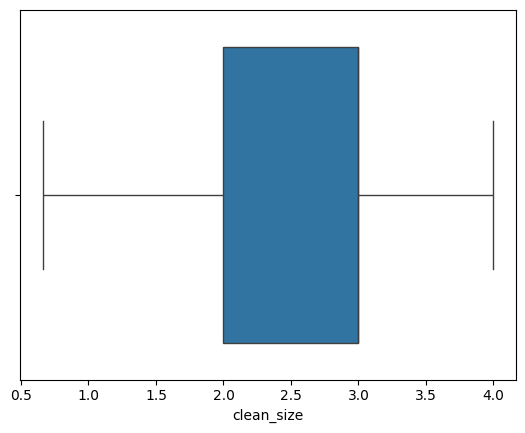

In [248]:
sns.boxplot(x=data['clean_size'])

# Bath

In [222]:
data['bath'].isna().sum()

70

<Axes: xlabel='bath'>

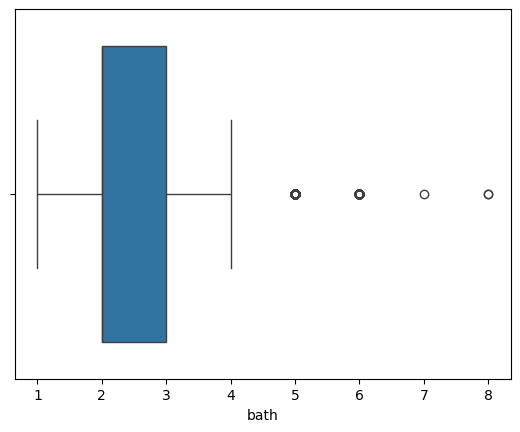

In [223]:
sns.boxplot(x=data['bath'])

In [224]:
## It will also have outliers so we fill missing values by using median

In [229]:
data['bath']=data['bath'].fillna(data['bath'].median())
data['bath'].isna().sum()


0

In [230]:
## Now we handel outliers 

In [231]:
# q1=data['bath'].quantile(0.25)
# q3=data['bath'].quantile(0.75)
# iqr=q3-q1
# lower=q1-1.5*iqr
# upper=q3+1.5*iqr
# mean=data.loc[data['bath']<upper]['bath'].mean()
# mean=round(mean,2)
# data.loc[data['bath']>upper]=round(upper,0)


In [249]:
outlier_handle('bath')

<Axes: xlabel='bath'>

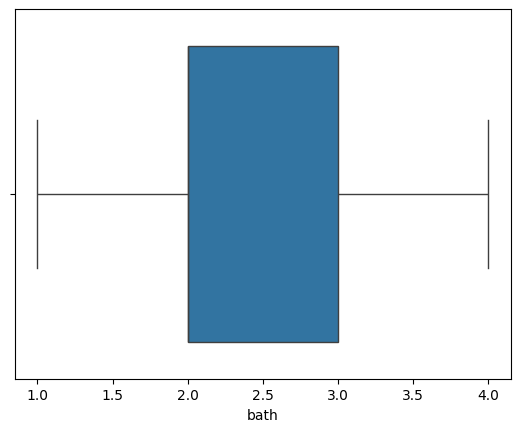

In [250]:
sns.boxplot(x=data['bath'])

# Balcony

In [251]:
data['balcony'].isna().sum()

0

<Axes: xlabel='balcony'>

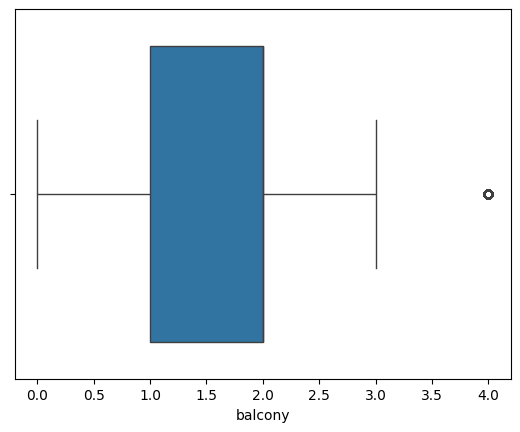

In [252]:
sns.boxplot(x=data['balcony'])

In [253]:
## There is outlier present in our data so we can fill it by using median 
data['balcony']=data['balcony'].fillna(data['balcony'].median())
data['balcony'].isna().sum()

0

In [236]:
## Now we can handle outliers 

In [240]:
# q1=data['balcony'].quantile(0.25)
# q3=data['balcony'].quantile(0.75)
# iqr=q3-q1
# lower=q1-1.5*iqr
# upper=q3+1.5*iqr
# # mean=data.loc[data['balcony']<upper]['balcony'].mean()
# mean=round(mean,2)
# data.loc[data['balcony']>upper]=round(upper,0)


In [254]:
def outlier_handle(a):
    q1=data[a].quantile(0.25)
    q3=data[a].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    data.loc[data[a]>upper]=round(upper,0)
    data.loc[data[a]<lower]=lower
    

In [255]:
outlier_handle('balcony')


<Axes: xlabel='balcony'>

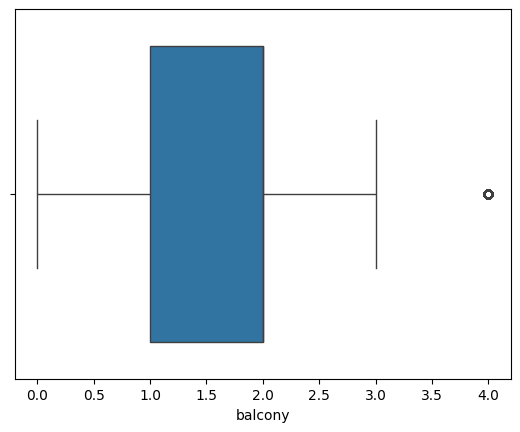

In [256]:
sns.boxplot(x=data['balcony'])

# total_sqft_clean

In [257]:
data['total_sqft_clean1'].isna().sum()

0

<Axes: xlabel='total_sqft_clean1'>

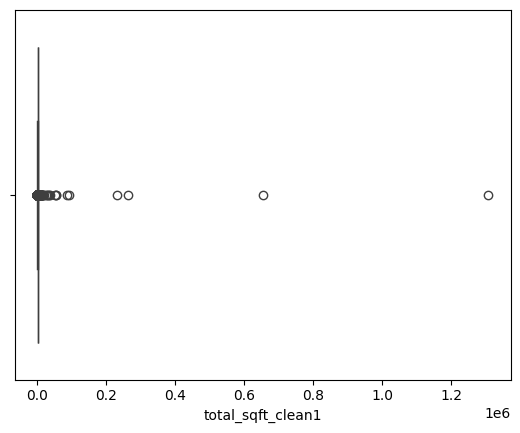

In [259]:
sns.boxplot(x=data['total_sqft_clean1'])

In [263]:
data['total_sqft_clean1']

0        1056.0
1         210.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315     210.0
13316     210.0
13317    1141.0
13318    2370.0
13319     550.0
Name: total_sqft_clean1, Length: 13320, dtype: float64

In [261]:
## Now we handle outliers 

In [262]:
outlier_handle('total_sqft_clean1')

<Axes: xlabel='total_sqft_clean1'>

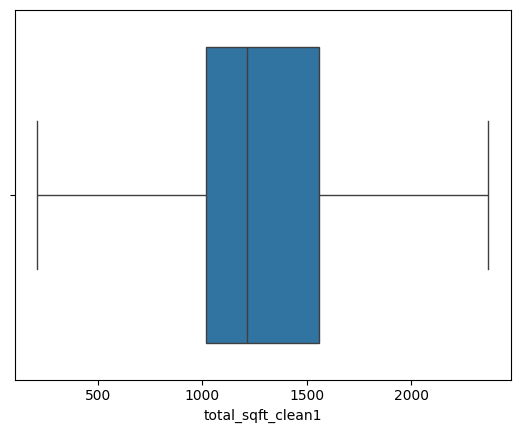

In [264]:
sns.boxplot(x=data['total_sqft_clean1'])

In [ ]:
#

## price_per_sqft

In [266]:
data['price'].isna().sum()

0

<Axes: xlabel='price'>

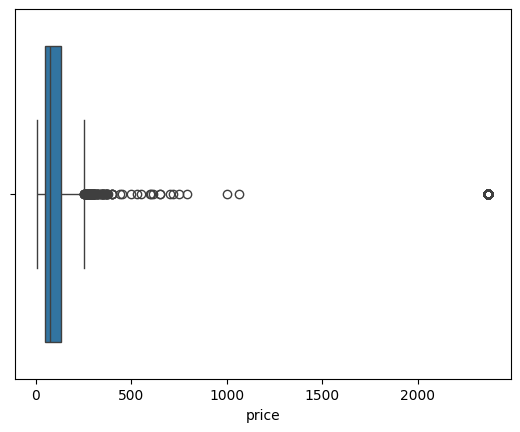

In [265]:
sns.boxplot(x=data['price'])

In [267]:
# Now we handle outliers 

In [269]:
outlier_handle('price')

<Axes: xlabel='price'>

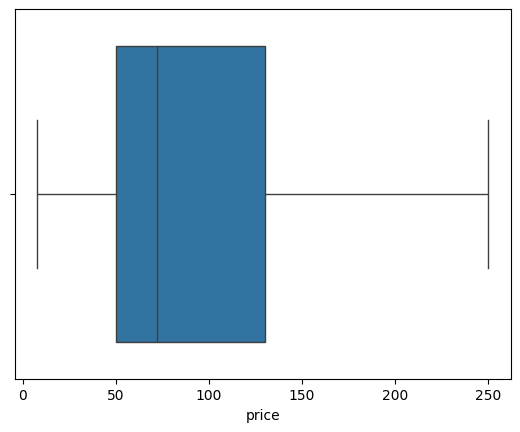

In [270]:
sns.boxplot(x=data['price'])

# Feature selection 

In [271]:
## First we check correlation with price

In [272]:
data.columns

Index(['bath', 'balcony', 'price', 'clean_size', 'total_sqft_clean1',
       'Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road',
       ...
       'Vadgaon Budruk', 'Viman Nagar', 'Vishrant Wadi', 'Wadgaon Sheri',
       'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje', 'Yerawada', 'other'],
      dtype='object', length=102)

In [279]:
dt=data[['price','bath','balcony','clean_size','total_sqft_clean1']]

<Axes: >

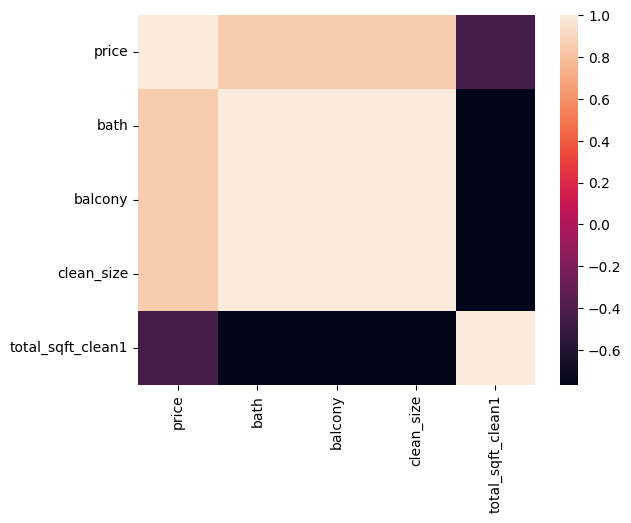

In [280]:
sns.heatmap(dt.corr())

In [282]:
dt.corr()

,price,bath,balcony,clean_size,total_sqft_clean1
price,1.000000,0.853815,0.852373,0.853670,-0.442843
bath,0.853815,1.000000,0.999959,0.999989,-0.764678
balcony,0.852373,0.999959,1.000000,0.999957,-0.765707
clean_size,0.853670,0.999989,0.999957,1.000000,-0.764621
total_sqft_clean1,-0.442843,-0.764678,-0.765707,-0.764621,1.000000


In [283]:
## It will show like bath,balcony clean size are strong correlated with price

In [285]:
## Now we select X and Y featture -- Y mean our dependent variable and x is out independent variable 

In [286]:
x=data.drop('price',axis=1)
y=data['price']

In [289]:
x.isna().sum()

bath                 0
balcony              0
clean_size           0
total_sqft_clean1    0
Alandi Road          0
                    ..
Wakadewadi           0
Wanowrie             0
Warje                0
Yerawada             0
other                0
Length: 101, dtype: int64

In [287]:
## Now we seperaing data into train and test split 

In [288]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [290]:
x_train.shape

(10656, 101)

In [291]:
x_train.columns

Index(['bath', 'balcony', 'clean_size', 'total_sqft_clean1', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Vadgaon Budruk', 'Viman Nagar', 'Vishrant Wadi', 'Wadgaon Sheri',
       'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje', 'Yerawada', 'other'],
      dtype='object', length=101)

# Model Building

In [293]:
linear=LinearRegression()

In [294]:
## WE fit linear regression model on train and test data
linear.fit(x_train,y_train)

LinearRegression()

In [295]:
linear.coef_

array([17.33865736, -4.62598691,  2.28925174,  0.04935521, -2.85294916,
       -0.57081284, -1.25234609,  3.66064025,  3.74924618,  0.28455334,
       -3.26132251,  2.593193  , -5.6425936 , -2.58778854,  2.59703569,
        0.69201349, -0.18907567,  2.5568793 ,  0.0956883 ,  2.13075763,
       -1.25651819,  0.05561714,  2.01588284, -2.98421607, -0.89191815,
        5.94381764,  2.61978441, -4.87106114, -0.42996853,  0.67839539,
        3.05714776,  3.3439236 , -7.5685492 ,  4.60429075,  0.83397586,
       -2.50753103,  1.41330576,  0.69944898,  3.63678998, -1.46060975,
        2.28179541, -0.47584725,  4.14840606, -2.85073797, -0.9087098 ,
        2.1129705 ,  0.91143691,  0.6152986 , -0.35803535, -5.15846338,
       -3.20408696,  7.84517362, -1.80064923,  5.72542168, -3.73589352,
        2.65340107, -1.87558034, -2.94240501,  1.68484371,  1.44346547,
       -0.04646734,  1.58888517,  6.47589341,  2.58761248, -3.47756907,
       -1.9022478 ,  3.56275732,  1.6751239 , -2.80221142,  2.43

In [296]:
linear.intercept_

-27.3661906157584

# Model Evaluation


In [297]:
y_pred_train=linear.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print('mse is :',mse)
rmse=np.sqrt(mse)
print('rmse is :',rmse)
r2score=r2_score(y_train,y_pred_train)
print('r2score is :',r2score)

mse is : 712.6150714686178
rmse is : 26.694851029152
r2score is : 0.8526773917336631


# # Testing Data Evaluation

In [299]:
## Evaaluation based on test data

In [300]:
y_pred_test=linear.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print('mse is :',mse)
rmse=np.sqrt(mse)
print('rmse is :',rmse)
r2=r2_score(y_test,y_pred_test)
print('r2 score is :',r2)

mse is : 697.488015788727
rmse is : 26.409998405693383
r2 score is : 0.8460673663305252


In [301]:
residual=y_test-y_pred_test

<Axes: xlabel='price', ylabel='Density'>

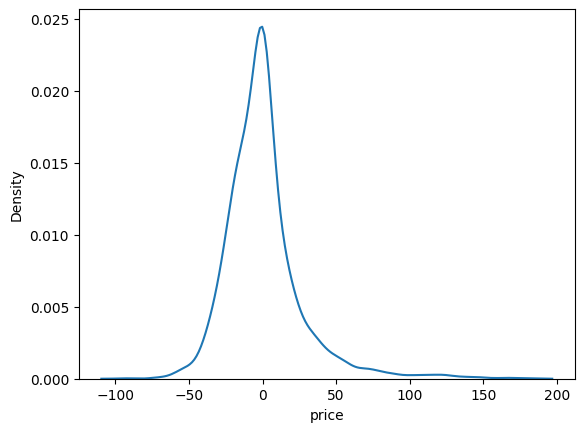

In [302]:
sns.kdeplot(residual)

In [303]:
## Now we can create pickle file of model

In [305]:
import pickle

In [306]:
columns_dict={"columns":x_train.columns}
dict_cols=open('columns.pkl','wb')
pickle.dump(columns_dict,dict_cols)
dict_cols.close()

In [307]:
linear_model=open('linear_model.pkl','wb')
pickle.dump(linear,linear_model)
linear_model.close()